## Example 01 - Conway's game of life

Snapshots saved as game_of_life_snapshots.png


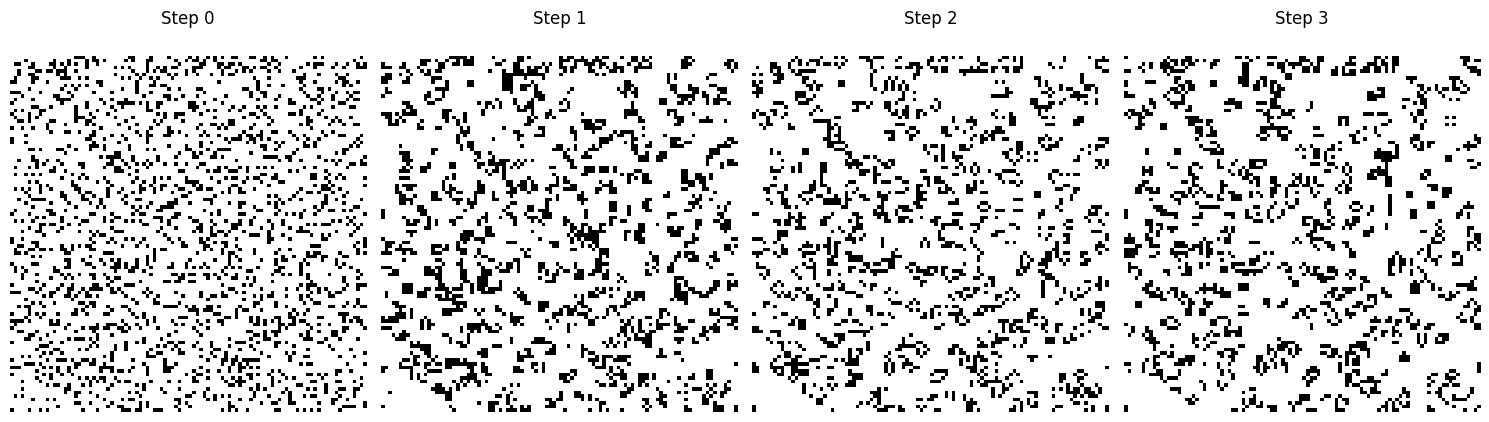

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 100  # Grid size
ON = 255  # Value for live cells
OFF = 0  # Value for dead cells
NUM_SNAPSHOTS = 4  # Number of snapshots to display
OUTPUT_FILENAME = "game_of_life_snapshots.png"  # File name for the PNG

# Initialize grid with random on/off values
def initialize_grid(size, on_prob=0.2):
    return np.random.choice([ON, OFF], size * size, p=[on_prob, 1 - on_prob]).reshape(size, size)

# Compute the next state of the grid
def update_grid(grid):
    new_grid = grid.copy()
    for i in range(N):
        for j in range(N):
            # Compute the sum of the 8 neighbors using toroidal boundary conditions
            neighbors = (
                grid[i, (j - 1) % N] + grid[i, (j + 1) % N] +
                grid[(i - 1) % N, j] + grid[(i + 1) % N, j] +
                grid[(i - 1) % N, (j - 1) % N] + grid[(i - 1) % N, (j + 1) % N] +
                grid[(i + 1) % N, (j - 1) % N] + grid[(i + 1) % N, (j + 1) % N]
            ) / 255

            # Apply Conway's rules
            if grid[i, j] == ON:
                if neighbors < 2 or neighbors > 3:
                    new_grid[i, j] = OFF
            else:
                if neighbors == 3:
                    new_grid[i, j] = ON
    return new_grid

# Generate multiple snapshots of the grid
def generate_snapshots(grid, num_steps):
    snapshots = [grid]
    for _ in range(num_steps - 1):
        grid = update_grid(grid)
        snapshots.append(grid)
    return snapshots

# Plot snapshots side by side and save as PNG
def plot_snapshots(snapshots, output_filename=None):
    num_snapshots = len(snapshots)
    fig, axes = plt.subplots(1, num_snapshots, figsize=(15, 5))

    for i, ax in enumerate(axes):
        ax.matshow(snapshots[i], cmap="binary")
        ax.set_title(f"Step {i}")
        ax.axis("off")

    plt.tight_layout()

    # Save the figure as PNG
    if output_filename:
        plt.savefig(output_filename, dpi=300)
        print(f"Snapshots saved as {output_filename}")

    plt.show()

# Initialize grid
grid = initialize_grid(N)

# Generate snapshots
snapshots = generate_snapshots(grid, NUM_SNAPSHOTS)

# Plot and save snapshots
plot_snapshots(snapshots, OUTPUT_FILENAME)


## Example 02 - Rule 30

Snapshots saved as rule_30.png


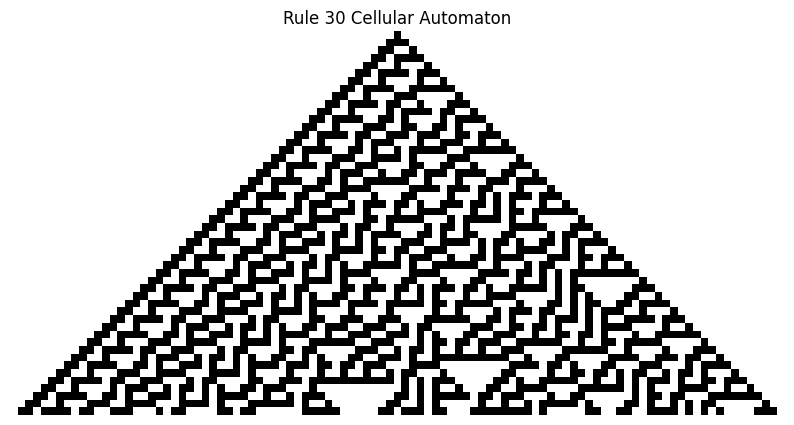

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Rule 30: A simple 1D cellular automaton
def rule_30(left, center, right):
    return (left ^ (center | right))

def generate_1d_ca(rule, size, steps):
    grid = np.zeros((steps, size), dtype=int)
    grid[0, size // 2] = 1  # Start with a single cell in the middle

    for t in range(1, steps):
        for i in range(1, size - 1):
            grid[t, i] = rule(grid[t-1, i-1], grid[t-1, i], grid[t-1, i+1])
    
    return grid

# Generate and visualize Rule 30
size = 101
steps = 50
grid = generate_1d_ca(rule_30, size, steps)

plt.figure(figsize=(10, 6))
plt.imshow(grid, cmap="binary")
plt.title("Rule 30 Cellular Automaton")
plt.axis("off")
OUTPUT_FILENAME = "rule_30.png"  # File name for the PNG
plt.savefig(OUTPUT_FILENAME, dpi=300)
print(f"Snapshots saved as {OUTPUT_FILENAME}")
plt.show()


## Example 03 - Traffic Flow Simulation using the Nagel-Schreckenberg Model

### NaSch Model Rules:
Acceleration: Increase speed by 1, up to the maximum speed.
Slowing Down: Reduce speed if the car ahead is too close.
Randomization: Randomly decrease speed to simulate imperfect driving.
Movement: Move the car forward based on its new speed

Explanation: We create a 2D array where rows represent time steps and columns represent positions on the road. 
         A value of 1 indicates a car, and 0 indicates an empty cell. 
         We then use imshow to display this array as an image.


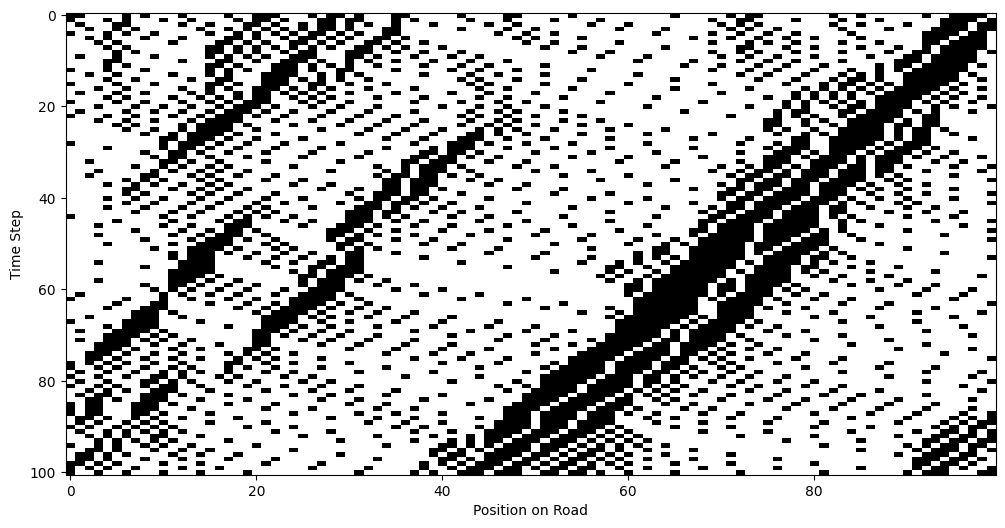

Explanation: We use FuncAnimation from matplotlib.animation to create an animation. 
      At each frame, we display the state of the road at that time step.


In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML


# Simulation parameters
road_length = 100         # Length of the road (number of cells)
num_cars = 30             # Number of cars on the road
max_speed = 5             # Maximum speed of cars (cells per time step)
p_slow = 0.3              # Probability of random slowing down
num_steps = 100           # Number of time steps to simulate

# road: An array representing the road where -1 indicates an empty cell.
# Initialize the road with empty cells (-1)
road = np.full(road_length, -1)

# Randomly place cars on the road with random initial speeds
car_positions = np.random.choice(road_length, num_cars, replace=False)
# Random initial speeds assigned to each car.
initial_speeds = np.random.randint(0, max_speed+1, num_cars)
road[car_positions] = initial_speeds


def update_road(road):
    new_road = np.full_like(road, -1)
    road_length = len(road)
    for i in range(road_length):
        if road[i] != -1:
            speed = road[i]
            # Step 1: Acceleration
            if speed < max_speed:
                speed += 1
            # Step 2: Slowing down due to other cars
            distance = 1
            while distance <= speed and road[(i + distance) % road_length] == -1:
                distance += 1
            distance -= 1
            speed = min(speed, distance)
            # Step 3: Randomization
            if speed > 0 and np.random.rand() < p_slow:
                speed -= 1
            # Step 4: Move the car
            new_position = (i + speed) % road_length
            new_road[new_position] = speed
    return new_road

# Store the history of the road for visualization
road_history = [road.copy()]
for step in range(num_steps):
    road = update_road(road)
    road_history.append(road.copy())


# Prepare the figure
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('Position on Road')
ax.set_ylabel('Time Step')

# Convert road history to a 2D array for visualization
road_display = []
for state in road_history:
    display_state = np.where(state >= 0, 1, 0)  # 1 for car, 0 for empty
    road_display.append(display_state)
road_display = np.array(road_display)

# Display the simulation as an image
im = ax.imshow(road_display, cmap='Greys', interpolation='none', aspect='auto')

print("""Explanation: We create a 2D array where rows represent time steps and columns represent positions on the road. 
         A value of 1 indicates a car, and 0 indicates an empty cell. 
         We then use imshow to display this array as an image.""")

# Show the plot
plt.show()



print("""Explanation: We use FuncAnimation from matplotlib.animation to create an animation. 
      At each frame, we display the state of the road at that time step.""")

# Create an animated visualization
fig, ax = plt.subplots(figsize=(12, 6))

def animate(i):
    ax.clear()
    ax.imshow([road_display[i]], cmap='Greys', aspect='auto')
    ax.set_title(f'Time Step {i}')
    ax.set_xlabel('Position on Road')
    ax.set_yticks([])

anim = animation.FuncAnimation(fig, animate, frames=num_steps, interval=200)
plt.close()
HTML(anim.to_jshtml())


